In [6]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [7]:
glass = pd.read_csv('data/glass.csv')

In [8]:
glass.head()

,RI,Na,Mg,Al,Si,K,Ca,Ba,Fe,Type
0,1.52101,13.64,4.49,1.10,71.78,0.06,8.75,0.0,0.0,1
1,1.51761,13.89,3.60,1.36,72.73,0.48,7.83,0.0,0.0,1
2,1.51618,13.53,3.55,1.54,72.99,0.39,7.78,0.0,0.0,1
3,1.51766,13.21,3.69,1.29,72.61,0.57,8.22,0.0,0.0,1
4,1.51742,13.27,3.62,1.24,73.08,0.55,8.07,0.0,0.0,1


In [9]:
glass.columns = ['ri','na','mg','al','si','k','ca','ba','fe','type']

In [10]:
glass.head()

,ri,na,mg,al,si,k,ca,ba,fe,type
0,1.52101,13.64,4.49,1.10,71.78,0.06,8.75,0.0,0.0,1
1,1.51761,13.89,3.60,1.36,72.73,0.48,7.83,0.0,0.0,1
2,1.51618,13.53,3.55,1.54,72.99,0.39,7.78,0.0,0.0,1
3,1.51766,13.21,3.69,1.29,72.61,0.57,8.22,0.0,0.0,1
4,1.51742,13.27,3.62,1.24,73.08,0.55,8.07,0.0,0.0,1


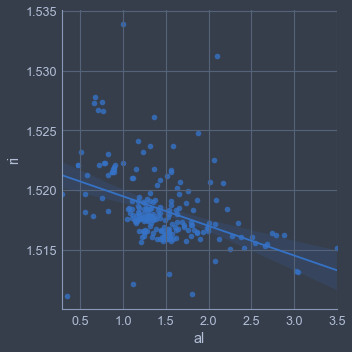

In [11]:
sns.lmplot(x='al', y='ri', data = glass)

In [12]:
# Reminder to re-create linear regression

In [13]:
glass.type.value_counts()

2    76
1    70
7    29
3    17
5    13
6     9
Name: type, dtype: int64

>  Window glass: 1,2 3

>  Household glass: 5,6,7

In [15]:
# Types 1,2,3 are window glass
# Types 5,6,7 are glass types

In [16]:
#first step access the column
#glass.type.
#second step chain the map function
#glass.type.
#step 3 add a dictionary inside the map function 1,2,3 -> 0 5,6,7 -> 1
#step 4 add this in a column
glass['household'] = glass.type.map({1:0, 2:0, 3:0, 5:1, 6:1, 7:1})

In [17]:
glass

,ri,na,mg,al,si,k,ca,ba,fe,type,household
0,1.52101,13.64,4.49,1.10,71.78,0.06,8.75,0.00,0.0,1,0
1,1.51761,13.89,3.60,1.36,72.73,0.48,7.83,0.00,0.0,1,0
2,1.51618,13.53,3.55,1.54,72.99,0.39,7.78,0.00,0.0,1,0
3,1.51766,13.21,3.69,1.29,72.61,0.57,8.22,0.00,0.0,1,0
4,1.51742,13.27,3.62,1.24,73.08,0.55,8.07,0.00,0.0,1,0
...,...,...,...,...,...,...,...,...,...,...,...
209,1.51623,14.14,0.00,2.88,72.61,0.08,9.18,1.06,0.0,7,1
210,1.51685,14.92,0.00,1.99,73.06,0.00,8.40,1.59,0.0,7,1
211,1.52065,14.36,0.00,2.02,73.42,0.00,8.44,1.64,0.0,7,1
212,1.51651,14.38,0.00,1.94,73.61,0.00,8.48,1.57,0.0,7,1


In [ ]:
#scatter plot , al and y should be household
plt.scatter()
glass.plot(kind='scatter')

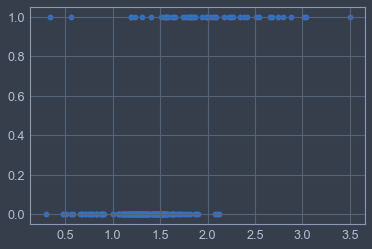

In [18]:
plt.scatter(x= 'al', y= 'household', data = glass)


In [ ]:
# Create a linerar regression showing the relationship bettwen al and household

In [ ]:
#Fit a linear regression model and store the predictions

In [20]:
from sklearn.linear_model import LinearRegression

In [24]:
feature_cols = ['al']

In [26]:
X = glass[feature_cols]
y = glass['household']

lr = LinearRegression()
lr.fit(X, y)
predictions = lr.predict(X)
glass['predictions'] = predictions

Text(0, 0.5, 'household')

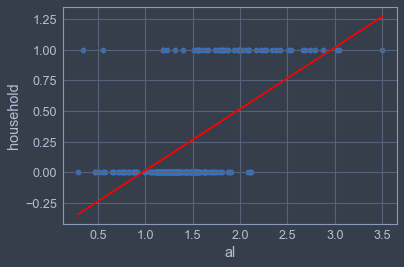

In [31]:
plt.scatter(x= 'al', y= 'household', data = glass)
plt.plot(glass['al'], glass['predictions'], color='red')
plt.xlabel('al')
plt.ylabel('household')


In [34]:
import numpy as np 

In [38]:
nums = np.array([5,10,15])

In [40]:
np.where(nums > 10, 1, 0)

array([0, 0, 1])

In [41]:
# Transform household prediction to 1 or 0 
glass['household_pred_class'] = np.where(glass['predictions'] >= 0.5, 1, 0)

Text(0, 0.5, 'household')

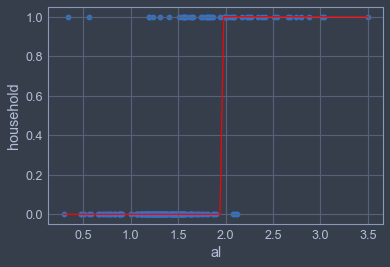

In [43]:
glass.sort_values('al', inplace=True)
plt.scatter(x= 'al', y= 'household', data = glass)
plt.plot(glass['al'], glass['household_pred_class'], color='red')
plt.xlabel('al')
plt.ylabel('household')

In [44]:
from sklearn.linear_model import LogisticRegression 

In [47]:
logreg = LogisticRegression ()

In [48]:
X = glass[feature_cols]
y = glass['household']

In [49]:
logreg.fit(X,y)
preds = logreg.predict(X)

Text(0, 0.5, 'household')

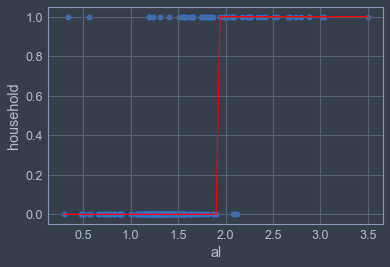

In [50]:
plt.scatter(x= 'al', y= 'household', data = glass)
plt.plot(glass['al'], preds, color='red')
plt.xlabel('al')
plt.ylabel('household')

In [53]:
glass['household_pred_prob'] = logreg.predict_proba(X)[:,1]

In [54]:
glass

,ri,na,mg,al,si,k,ca,ba,fe,type,household,predictions,household_pred_class,household_pred_prob
21,1.51966,14.77,3.75,0.29,72.02,0.03,9.00,0.00,0.00,1,0,-0.340495,0,0.006024
184,1.51115,17.38,0.00,0.34,75.41,0.00,6.65,0.00,0.00,6,1,-0.315436,0,0.007032
39,1.52213,14.21,3.82,0.47,71.77,0.11,9.57,0.00,0.00,1,0,-0.250283,0,0.010506
38,1.52213,14.21,3.82,0.47,71.77,0.11,9.57,0.00,0.00,1,0,-0.250283,0,0.010506
50,1.52320,13.72,3.72,0.51,71.75,0.09,10.06,0.00,0.16,1,0,-0.230236,0,0.011884
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
192,1.51623,14.20,0.00,2.79,73.46,0.04,9.04,0.40,0.09,7,1,0.912448,1,0.935956
209,1.51623,14.14,0.00,2.88,72.61,0.08,9.18,1.06,0.00,7,1,0.957554,1,0.950845
172,1.51321,13.00,0.00,3.02,70.70,6.21,6.93,0.00,0.00,5,1,1.027718,1,0.967657
171,1.51316,13.02,0.00,3.04,70.48,6.21,6.96,0.00,0.00,5,1,1.037742,1,0.969552


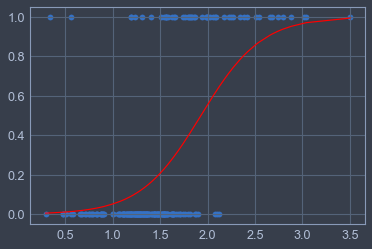

In [55]:
plt.scatter(x= 'al', y= 'household', data = glass)
plt.plot(glass['al'], glass['household_pred_prob'], color='red')

- Build and train a logistic regression model.
- Select 2 features for you X
- Train test split
- y will remain the same `glass.household`
- Evaluate the model with `model.score` on the testing data.

In [ ]:
logreg.score(X_test, y_test)

In [69]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split

In [81]:
logreg = LogisticRegression()

In [82]:
X = glass[['na','mg']]
y = glass.household

In [83]:
X_train, X_test, y_train, y_test = train_test_split(X,y, random_state =123)

In [84]:
logreg.fit(X_train,y_train)

LogisticRegression()

In [85]:
logreg.score(X_test,y_test)

0.9444444444444444

$$probability = \frac {one\ outcome} {all\ outcomes}$$


Dice roll probabilty - > 1 / 6

$$odds = \frac {one\ outcome} {all\ other\ outcomes}$$

Dice roll odds 1 / 5

$odds = \frac {probability} {1 - probability}$


In [ ]:
y = b + b1 * X

Linear Regression

$$y = \beta_0 + \beta_1x$$

Logistic Regression line

$$\log \left({p\over 1-p}\right) = \beta_0 + \beta_1x$$

# Advance Classification Metrics

$$Accuracy = \frac{total~predicted~correct}{total~predicted}$$

<table style="border: none">
<tr style="border: none">
    <td style="border: none; vertical-align: bottom">n = 165</td>
    <td style=""><b>Predicted: No</b></td>
    <td style=""><b>Predicted: Yes</b></td>
</tr>
<tr>
    <td><b>Actual: No</b></td>
    <td style="text-align: center"></td>
    <td style="text-align: center"></td>
    <td style="text-align: center"></td>
</tr>
<tr>
    <td><b>Actual: Yes</b></td>
    <td style="text-align: center"></td>
    <td style="text-align: center"></td>
    <td style="text-align: center"></td>
</tr>
<tr style="border: none">
    <td style="border: none"></td>
    <td style="text-align: center"></td>
    <td style="text-align: center"></td>
</tr>

</table>

<table style="border: none">
<tr style="border: none">
    <td style="border: none; vertical-align: bottom">n = 165</td>
    <td style=""><b>Predicted: No</b></td>
    <td style=""><b>Predicted: Yes</b></td>
</tr>
<tr>
    <td><b>Actual: No</b></td>
    <td style="text-align: center"></td>
    <td style="text-align: center"></td>
    <td style="text-align: center">60</td>
</tr>
<tr>
    <td><b>Actual: Yes</b></td>
    <td style="text-align: center"></td>
    <td style="text-align: center"></td>
    <td style="text-align: center">105</td>
</tr>
<tr style="border: none">
    <td style="border: none"></td>
    <td style="text-align: center"></td>
    <td style="text-align: center"></td>
</tr>

</table>

<table style="border: none">
<tr style="border: none">
    <td style="border: none; vertical-align: bottom">n = 165</td>
    <td style=""><b>Predicted: No</b></td>
    <td style=""><b>Predicted: Yes</b></td>
</tr>
<tr>
    <td><b>Actual: No</b></td>
    <td style="text-align: center"></td>
    <td style="text-align: center"></td>
    <td style="text-align: center">60</td>
</tr>
<tr>
    <td><b>Actual: Yes</b></td>
    <td style="text-align: center"></td>
    <td style="text-align: center"></td>
    <td style="text-align: center">105</td>
</tr>
<tr style="border: none">
    <td style="border: none"></td>
    <td style="text-align: center">55</td>
    <td style="text-align: center">110</td>
</tr>

</table>

<table style="border: none">
<tr style="border: none">
    <td style="border: none; vertical-align: bottom">n = 165</td>
    <td style=""><b>Predicted: No</b></td>
    <td style=""><b>Predicted: Yes</b></td>
</tr>
<tr>
    <td><b>Actual: No</b></td>
    <td style="text-align: center">TN = 50</td>
    <td style="text-align: center">FP = 10</td>
    <td style="text-align: center">60</td>
</tr>
<tr>
    <td><b>Actual: Yes</b></td>
    <td style="text-align: center">FN = 5</td>
    <td style="text-align: center">TP = 100</td>
    <td style="text-align: center">105</td>
</tr>
<tr style="border: none">
    <td style="border: none"></td>
    <td style="text-align: center">55</td>
    <td style="text-align: center">110</td>
</tr>

</table>

True Negatives + True Positives = all the times that I was correct

In [89]:
(50 + 100) / 165 

0.9090909090909091

TPR : True Positive Rate 

In [90]:
100 / 105

0.9523809523809523

FPR: False Positive Rate

In [92]:
10 / 60

0.16666666666666666

<table style="border: none">
<tr style="border: none">
    <td style="border: none; vertical-align: bottom">n = 165</td>
    <td style=""><b>Predicted: No</b></td>
    <td style=""><b>Predicted: Yes</b></td>
</tr>
<tr>
    <td><b>Actual: No</b></td>
    <td style="text-align: center">TN = 150</td>
    <td style="text-align: center">FP = 10</td>
    <td style="text-align: center">160</td>
</tr>
<tr>
    <td><b>Actual: Yes</b></td>
    <td style="text-align: center">FN = 5</td>
    <td style="text-align: center">TP = 0</td>
    <td style="text-align: center">5</td>
</tr>
<tr style="border: none">
    <td style="border: none"></td>
    <td style="text-align: center">155</td>
    <td style="text-align: center">10</td>
</tr>

</table>

In [ ]:
TN + TP = 150

In [93]:
150 / 165

0.9090909090909091

TPR

In [ ]:
TP / Actual

In [95]:
0 / 5

0.0